In [1]:
import pandas as pd
import requests

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

load wine quality dataset

In [2]:
from google.colab import files
uploaded = files.upload()


Saving WineQT.csv to WineQT.csv


In [3]:
df=pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


All columns are numerical ,we dont need to convert to categorical data to numerical data


Drop unnecessary column  like id

In [4]:
df.drop(columns=['Id'], inplace=True, errors='ignore')


Convert Target to Binary

In [5]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.drop(columns=['quality'], inplace=True)


Now:

1 → Good wine

0 → Bad wine

Split Features & Target

In [9]:
x= df.drop('quality_label', axis=1)
y = df['quality_label']


*split* dataset into training and testing


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


Standardization scales the feature values so that:

Mean = 0

Standard Deviation = 1

This helps many machine learning algorithms perform better, especially those that are distance-based or gradient-based.

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_text=scaler.transform(x_test)

**lOGISTIC REGRESSION**

In [12]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred_lr=lr.predict(x_text)

**2. K-NEAREST NEIGHBORS(KNN)**

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

y_pred_knn=knn.predict(x_text)

3. decision tree classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion="gini" ,random_state=42)
dt.fit(x_train,y_train)

y_pred_dt=dt.predict(x_text)

4.suppoet vector machine

In [15]:
from sklearn.svm import SVC
svm=SVC(kernel="linear")
svm.fit(x_train,y_train)

y_pred_svm=svm.predict(x_text)

5.navie bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_text)

6.linear regression


In [17]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lir=lr.predict(x_text)

In [18]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9082969432314411


In [19]:
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 0.8733624454148472


In [20]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8733624454148472


In [21]:
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))

Support Vector Machine Accuracy: 0.8777292576419214


In [22]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8384279475982532


In [26]:
y_pred_lir_binary = (y_pred_lir >= 0.5).astype(int)
print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_lir_binary))

Linear Regression Accuracy: 0.868995633187773


In [27]:
models = {
    "Logistic Regression":y_pred_lr,
    "K-Nearest Neighbors":y_pred_knn,
    "Decision Tree":y_pred_dt,
    "Support Vector Machine":y_pred_svm,
    "Naive Bayes":y_pred_nb,
    "Linear Regression":y_pred_lir
}
for model, pred in models.items():
  print(model)
  if model != "Linear Regression": # Apply classification metrics only to classification models
    print("accuracy:", accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
  else:
    print("Regression model - classification metrics not applicable here.")
  print("-" * 30)

Logistic Regression
accuracy: 0.9082969432314411
[[193   8]
 [ 13  15]]
------------------------------
K-Nearest Neighbors
accuracy: 0.8733624454148472
[[192   9]
 [ 20   8]]
------------------------------
Decision Tree
accuracy: 0.8733624454148472
[[180  21]
 [  8  20]]
------------------------------
Support Vector Machine
accuracy: 0.8777292576419214
[[201   0]
 [ 28   0]]
------------------------------
Naive Bayes
accuracy: 0.8384279475982532
[[172  29]
 [  8  20]]
------------------------------
Linear Regression
Regression model - classification metrics not applicable here.
------------------------------


In [31]:
print("classfication report")
print(classification_report(y_test,y_pred_lr))

classfication report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       201
           1       0.65      0.54      0.59        28

    accuracy                           0.91       229
   macro avg       0.79      0.75      0.77       229
weighted avg       0.90      0.91      0.90       229



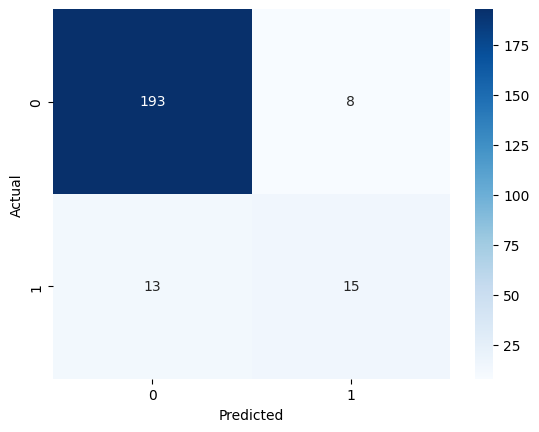

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()